<a href="https://colab.research.google.com/github/DT1768/ML-DS-Lab-MSU-PGDCA-Sem-2/blob/main/LAB-5/LAB_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Dhruvkumar Dhirubhai Thakkar** 

**Assignment-5**	

**PRN: 8021028675**

**Machine Learning and Data Science Lab**


# **K-means clusterring using Elbow Method**

**Functions Used**
1. **sklearn.cluster.KMeans** - To define number of clusters/centroids
2. **sklearn.cluster.KMeans.fit** - To Compute k-means clustering on given data
3. **sklearn.cluster.KMeans.fit_predict** - To Compute cluster centers and predict cluster index for each sample.
4. **sklearn.cluster.KMeans.inertia_** - To get Sum of squared distances of samples to their closest cluster center.

In [2]:
#importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans

#importing data set
data = '/content/average-latitude-longitude-countries.csv'
df = pd.read_csv(data)
df.head()

,ISO 3166 Country Code,Country,Latitude,Longitude
0,AD,Andorra,42.50,1.50
1,AE,United Arab Emirates,24.00,54.00
2,AF,Afghanistan,33.00,65.00
3,AG,Antigua and Barbuda,17.05,-61.80
4,AI,Anguilla,18.25,-63.17


In [3]:
#Removing Unnecessary Data
x = df.drop(['ISO 3166 Country Code','Country'],axis=1)
x.head()

,Latitude,Longitude
0,42.50,1.50
1,24.00,54.00
2,33.00,65.00
3,17.05,-61.80
4,18.25,-63.17


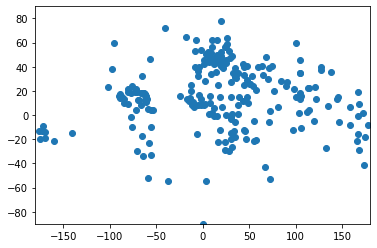

In [4]:
#Plotting Data
plt.scatter(x['Longitude'],x['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [5]:
#clusterring
kmeans = KMeans(7)
kmeans.fit(x)
clusters = kmeans.fit_predict(x)
print(clusters)

#result

result = x.copy()
result['Clusters'] = clusters

[0 5 5 3 3 0 5 3 4 1 4 3 2 0 6 3 5 0 3 1 0 0 0 5 4 0 3 1 3 3 3 1 4 4 0 3 3
 1 4 4 4 0 0 2 3 4 1 3 3 3 0 1 5 0 0 5 0 3 3 0 3 0 5 0 5 0 5 0 0 6 3 6 0 0
 4 0 3 5 3 0 0 0 0 0 3 4 0 3 3 6 0 3 1 4 3 0 3 0 1 0 5 5 5 5 5 0 0 3 5 1 4
 5 1 6 4 3 1 1 5 3 5 1 5 3 0 1 0 4 0 0 0 0 0 0 0 0 4 6 0 0 1 1 1 6 3 0 3 0
 4 5 4 3 1 4 4 6 0 6 0 3 0 0 1 6 2 6 5 3 3 2 6 1 5 0 3 3 5 0 6 3 5 4 0 0 1
 4 5 6 4 5 0 1 4 0 0 0 0 0 0 5 3 4 3 5 4 3 0 4 0 1 5 2 5 0 2 5 3 6 1 4 0 4
 6 3 3 5 0 3 3 3 3 1 6 2 2 5 4 4 4 4]


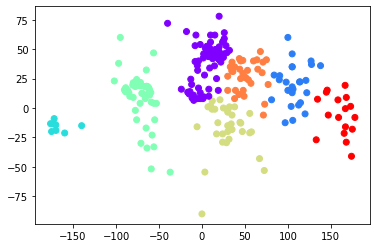

In [6]:
#plotting
plt.scatter(result['Longitude'],result['Latitude'],c=result['Clusters'],cmap = 'rainbow')

Text(0, 0.5, 'Sum of squared distance')

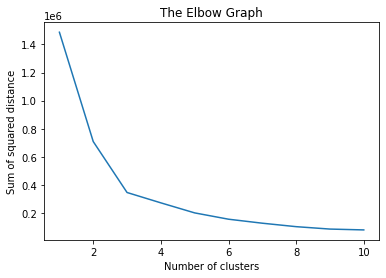

In [7]:
squared_distance=[]
for i in range(1,11):
  kmeans = KMeans(i)
  kmeans.fit(x)
  iter = kmeans.inertia_
  squared_distance.append(iter)

number_clusters = range(1,11)
plt.plot(number_clusters,squared_distance)
plt.title('The Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance')

In [8]:
#From Elbow Graph Optimal No. of clusters is 3.
#clusterring
kmeans = KMeans(3)
kmeans.fit(x)
clusters = kmeans.fit_predict(x)
print(clusters)

#result

result = x.copy()
result['Clusters'] = clusters

[0 0 0 2 2 0 0 2 0 1 0 2 2 0 1 2 0 0 2 1 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 2 2
 1 0 0 0 0 0 2 2 0 1 2 2 2 0 1 0 0 0 0 0 2 2 0 2 0 0 0 0 0 0 0 0 1 2 1 0 0
 0 0 2 0 2 0 0 0 0 0 2 0 0 2 2 1 0 2 1 1 2 0 2 0 1 0 0 1 1 0 0 0 0 2 0 1 0
 0 1 1 0 2 1 1 0 2 0 1 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 2 0 2 0
 0 1 0 2 1 0 0 1 0 1 0 2 0 0 1 1 2 1 0 2 2 2 1 1 0 0 2 2 0 0 1 2 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 2 0 2 0 0 2 0 1 0 1 0 2 0 0 2 0 2 1 1 0 0 0
 1 2 2 0 0 2 2 2 2 1 1 2 2 0 0 0 0 0]


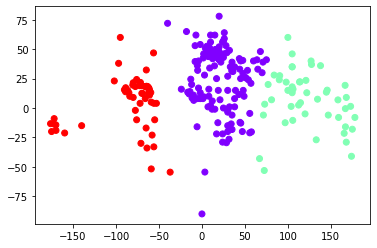

In [9]:
#plotting
plt.scatter(result['Longitude'],result['Latitude'],c=result['Clusters'],cmap = 'rainbow')